In [1]:

import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from SpeechModels import get_melspec_model
from augment_layers import TimeMaskLayer, FreqMaskLayer

In [2]:
train_ds = tf.keras.utils.audio_dataset_from_directory(
    directory="data/train",
    batch_size=512,
    output_sequence_length=16000
)

melspec = get_melspec_model(16000)
time_mask = TimeMaskLayer(10)
freq_mask = FreqMaskLayer(10)

Found 45586 files belonging to 12 classes.


In [3]:
for x, y in train_ds.take(1):
    x_temp, y_temp = x[300], y[300]

x_mel = melspec(tf.squeeze(x_temp))
x_mel = tf.expand_dims(x_mel, 0)
x_time_mask = time_mask(x_mel, training=True).numpy().squeeze().T
x_freq_mask = freq_mask(x_mel, training=True).numpy().squeeze().T
x_mel = x_mel.numpy().squeeze().T

In [4]:
x_mel.shape, x_time_mask.shape, x_freq_mask.shape

((80, 125), (80, 125), (80, 125))

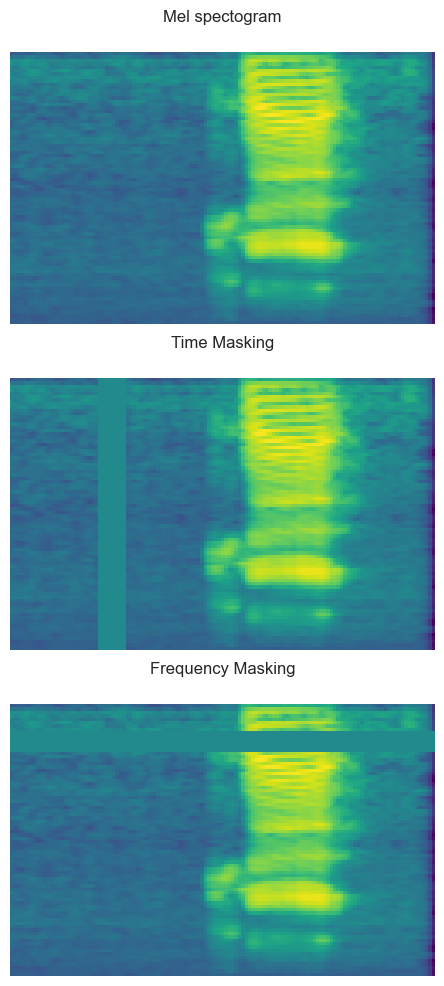

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
axes[0].set_title("Mel spectogram")
axes[0].matshow(x_mel, cmap="viridis")
axes[0].set_axis_off()
axes[1].set_title("Time Masking")
axes[1].matshow(x_time_mask, cmap='viridis')
axes[1].set_axis_off()
axes[2].set_title("Frequency Masking")
axes[2].matshow(x_freq_mask, cmap='viridis')
axes[2].set_axis_off()
plt.show()